<h2>Gender Classification with Ensemble Learning</h2>
<p>Data source: https://www.kaggle.com/hb20007/gender-classification</p>
<p>Created by: Vytautas Bielinskas</p>
<p>Date of creation: 16 Oct 2018</p>

<h3>Goal of the model: <i>classify genres to male or female based on given criterions by apply Ensemble Learning</i></h3>

<h3>Full Code</h3>

<b><u>IMPORT MODULES AND PACKAGES</u></b>

In [1]:
# Import main modules and packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

<b><u>READ AND INSPECT DATASET</u></b>

In [2]:
dataset = pd.read_csv('gender-classification/gender_data.csv')
print('{}\n\n.'.format(dataset.head(4)))

print(dataset.info())

  Favorite Color Favorite Music Genre Favorite Beverage Favorite Soft Drink  \
0           Cool                 Rock             Vodka          7UP/Sprite   
1        Neutral              Hip hop             Vodka     Coca Cola/Pepsi   
2           Warm                 Rock              Wine     Coca Cola/Pepsi   
3           Warm     Folk/Traditional           Whiskey               Fanta   

  Gender  
0      F  
1      F  
2      F  
3      F  

.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
Favorite Color          66 non-null object
Favorite Music Genre    66 non-null object
Favorite Beverage       66 non-null object
Favorite Soft Drink     66 non-null object
Gender                  66 non-null object
dtypes: object(5)
memory usage: 1.3+ KB
None


<p>From the first sight we can see that there are mostly text categorical features and <b>no missing data</b>. Each of those must be transformed to dummy variables. But before let's see unique values of each features.</p>

In [3]:
# Check unique values for each feature
for column in dataset.columns:
    print('{}\n{} --> {} unique values.\n'.format(column,
                                                  dataset[column].unique(),
                                                  len(dataset[column].unique())))

Favorite Color
['Cool' 'Neutral' 'Warm'] --> 3 unique values.

Favorite Music Genre
['Rock' 'Hip hop' 'Folk/Traditional' 'Jazz/Blues' 'Pop' 'Electronic'
 'R&B and soul'] --> 7 unique values.

Favorite Beverage
['Vodka' 'Wine' 'Whiskey' "Doesn't drink" 'Beer' 'Other'] --> 6 unique values.

Favorite Soft Drink
['7UP/Sprite' 'Coca Cola/Pepsi' 'Fanta' 'Other'] --> 4 unique values.

Gender
['F' 'M'] --> 2 unique values.



<p>First of all we need to separate: what is independend features (<code>X</code>) and what is dependend feature (<code>y</code>).</p>

<b><u>GENERATE <code>X</code> and <code>y</code> SETS OF VARIABLES</u></b>

In [4]:
# Extract features to dependend variables (y) and independend variables (X)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

print('Independend variables:\n{}\n'.format(X))
print('Dependend variables:\n{}'.format(y))

Independend variables:
[['Cool' 'Rock' 'Vodka' '7UP/Sprite']
 ['Neutral' 'Hip hop' 'Vodka' 'Coca Cola/Pepsi']
 ['Warm' 'Rock' 'Wine' 'Coca Cola/Pepsi']
 ['Warm' 'Folk/Traditional' 'Whiskey' 'Fanta']
 ['Cool' 'Rock' 'Vodka' 'Coca Cola/Pepsi']
 ['Warm' 'Jazz/Blues' "Doesn't drink" 'Fanta']
 ['Cool' 'Pop' 'Beer' 'Coca Cola/Pepsi']
 ['Warm' 'Pop' 'Whiskey' 'Fanta']
 ['Warm' 'Rock' 'Other' '7UP/Sprite']
 ['Neutral' 'Pop' 'Wine' 'Coca Cola/Pepsi']
 ['Cool' 'Pop' 'Other' '7UP/Sprite']
 ['Warm' 'Pop' 'Other' '7UP/Sprite']
 ['Warm' 'Pop' 'Wine' '7UP/Sprite']
 ['Warm' 'Electronic' 'Wine' 'Coca Cola/Pepsi']
 ['Cool' 'Rock' 'Beer' 'Coca Cola/Pepsi']
 ['Warm' 'Jazz/Blues' 'Wine' 'Coca Cola/Pepsi']
 ['Cool' 'Pop' 'Wine' '7UP/Sprite']
 ['Cool' 'Rock' 'Other' 'Coca Cola/Pepsi']
 ['Cool' 'Rock' 'Other' 'Coca Cola/Pepsi']
 ['Cool' 'Pop' "Doesn't drink" '7UP/Sprite']
 ['Cool' 'Pop' 'Beer' 'Fanta']
 ['Warm' 'Jazz/Blues' 'Whiskey' 'Fanta']
 ['Cool' 'Rock' 'Vodka' 'Coca Cola/Pepsi']
 ['Warm' 'Pop' 'Other' '

<b><u>LABEL ENCODING</u></b>
<p>Handling categorical variables. There are <b>4</b> features that will be transformed into dummy variables.</p>

In [5]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder

# >> encoding <Favorite Color> : [0] from X dataset
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])

# >> encoding <Favorite Music Genre> : [1] from X dataset
X[:, 1] = labelencoder_X.fit_transform(X[:, 1])

# >> encoding <Favorite Beverage> : [2] from X dataset
X[:, 2] = labelencoder_X.fit_transform(X[:, 2])

# >> encoding <Favorite Soft Drink> : [3] from X dataset
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])

print('Encoded dependend features columns (X):\n{}'.format(X))
print('Currently X dataset has {} columns.'.format(X.shape[1]))

Encoded dependend features columns (X):
[[0 6 3 0]
 [1 2 3 1]
 [2 6 5 1]
 [2 1 4 2]
 [0 6 3 1]
 [2 3 1 2]
 [0 4 0 1]
 [2 4 4 2]
 [2 6 2 0]
 [1 4 5 1]
 [0 4 2 0]
 [2 4 2 0]
 [2 4 5 0]
 [2 0 5 1]
 [0 6 0 1]
 [2 3 5 1]
 [0 4 5 0]
 [0 6 2 1]
 [0 6 2 1]
 [0 4 1 0]
 [0 4 0 2]
 [2 3 4 2]
 [0 6 3 1]
 [2 4 2 1]
 [0 1 4 0]
 [2 5 4 1]
 [0 4 0 3]
 [0 4 1 3]
 [0 4 1 1]
 [0 0 1 2]
 [2 6 2 1]
 [1 6 0 1]
 [0 5 0 1]
 [2 5 5 3]
 [1 2 0 0]
 [2 0 2 1]
 [1 6 1 1]
 [0 4 2 2]
 [0 4 4 2]
 [2 6 3 0]
 [0 6 3 1]
 [1 4 1 0]
 [2 5 1 1]
 [0 6 5 0]
 [0 1 0 3]
 [0 2 0 1]
 [0 2 5 1]
 [0 5 4 0]
 [0 6 1 3]
 [2 2 0 1]
 [0 5 1 1]
 [0 6 1 1]
 [0 2 1 3]
 [2 6 0 2]
 [0 0 1 2]
 [0 0 2 2]
 [2 1 2 2]
 [2 0 3 2]
 [2 3 3 1]
 [0 4 4 3]
 [0 0 4 1]
 [0 6 3 1]
 [0 2 0 1]
 [1 2 1 2]
 [0 6 5 1]
 [0 0 0 1]]
Currently X dataset has 4 columns.


<p>As we can see from the first column <code><b>Favorite Color</b></code>>:
<ul>>> <code>0</code> – corresponds to <code>Cool</code></ul>
<ul>>> <code>1</code> – corresponds to <code>Neutral</code></ul>
<ul>>> <code>2</code> – corresponds to <code>Warm</code></ul></p></b>
<p>It seems good, but we dont't have a categorical order so far. Instead of this we have just values <code>1</code>, <code>2</code>, <code>3</code>, etc. for the category. The model will intepreter those values as weights of a '<i>single</i>' category but not as different variables. In order to make it correct we must transform each column with containing values into <b>dummy variables</b> where each collumn will correspond to each category (for example of <code>Favorite Color</code>).</p>

<b><u>DUMMY VARIABLES</u></b>

In [6]:
# Tranform <Favorite Color> [0] Categorical variable to Dummy variable
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()

print('X dataset with 1st dummy variable at index [0]:\n{}'.format(X))
print('Currently X dataset has {} columns.'.format(X.shape[1]))

X dataset with 1st dummy variable at index [0]:
[[ 1.  0.  0.  6.  3.  0.]
 [ 0.  1.  0.  2.  3.  1.]
 [ 0.  0.  1.  6.  5.  1.]
 [ 0.  0.  1.  1.  4.  2.]
 [ 1.  0.  0.  6.  3.  1.]
 [ 0.  0.  1.  3.  1.  2.]
 [ 1.  0.  0.  4.  0.  1.]
 [ 0.  0.  1.  4.  4.  2.]
 [ 0.  0.  1.  6.  2.  0.]
 [ 0.  1.  0.  4.  5.  1.]
 [ 1.  0.  0.  4.  2.  0.]
 [ 0.  0.  1.  4.  2.  0.]
 [ 0.  0.  1.  4.  5.  0.]
 [ 0.  0.  1.  0.  5.  1.]
 [ 1.  0.  0.  6.  0.  1.]
 [ 0.  0.  1.  3.  5.  1.]
 [ 1.  0.  0.  4.  5.  0.]
 [ 1.  0.  0.  6.  2.  1.]
 [ 1.  0.  0.  6.  2.  1.]
 [ 1.  0.  0.  4.  1.  0.]
 [ 1.  0.  0.  4.  0.  2.]
 [ 0.  0.  1.  3.  4.  2.]
 [ 1.  0.  0.  6.  3.  1.]
 [ 0.  0.  1.  4.  2.  1.]
 [ 1.  0.  0.  1.  4.  0.]
 [ 0.  0.  1.  5.  4.  1.]
 [ 1.  0.  0.  4.  0.  3.]
 [ 1.  0.  0.  4.  1.  3.]
 [ 1.  0.  0.  4.  1.  1.]
 [ 1.  0.  0.  0.  1.  2.]
 [ 0.  0.  1.  6.  2.  1.]
 [ 0.  1.  0.  6.  0.  1.]
 [ 1.  0.  0.  5.  0.  1.]
 [ 0.  0.  1.  5.  5.  3.]
 [ 0.  1.  0.  2.  0.  0.]
 [ 0.  

In [7]:
# Tranform <Favorite Color> [3] Categorical variable to Dummy variable
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()

print('X dataset with 2nd dummy variable at index [3]:\n{}'.format(X))
print('Currently X dataset has {} columns.'.format(X.shape[1]))

X dataset with 2nd dummy variable at index [3]:
[[ 0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  3.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  3.  1.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  5.  1.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  4.  2.]
 [ 0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  3.  1.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  1.  2.]
 [ 0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  4.  2.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  2.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  5.  1.]
 [ 0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  2.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  2.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  5.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  5.  1.]
 [ 0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  1.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  5.  1.]
 [ 0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  5.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  2.  1.]
 [ 0.  0.  0.  0.  0.  0.  1.  1. 

In [8]:
# Tranform <Favorite Beverage> [10] Categorical variable to Dummy variable
onehotencoder = OneHotEncoder(categorical_features = [10])
X = onehotencoder.fit_transform(X).toarray()

print('X dataset with 3nd dummy variable at index [10]:\n{}'.format(X))
print('Currently X dataset has {} columns.'.format(X.shape[1]))

X dataset with 3nd dummy variable at index [10]:
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  1.  0.  1.]
 [ 0.  0.  0. ...,  0.  1.  1.]
 ..., 
 [ 0.  1.  0. ...,  1.  0.  2.]
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 1.  0.  0. ...,  0.  0.  1.]]
Currently X dataset has 17 columns.


In [9]:
# Tranform <Favorite Soft Drink [16] Categorical variable to Dummy variable
onehotencoder = OneHotEncoder(categorical_features = [16])
X = onehotencoder.fit_transform(X).toarray()

print('X dataset with 2nd dummy variable at index [16]:\n{}'.format(X))
print('Currently X dataset has {} columns.'.format(X.shape[1]))

X dataset with 2nd dummy variable at index [16]:
[[ 1.  0.  0. ...,  1.  0.  0.]
 [ 0.  1.  0. ...,  0.  1.  0.]
 [ 0.  1.  0. ...,  0.  0.  1.]
 ..., 
 [ 0.  0.  1. ...,  0.  1.  0.]
 [ 0.  1.  0. ...,  1.  0.  0.]
 [ 0.  1.  0. ...,  1.  0.  0.]]
Currently X dataset has 20 columns.


<p>Encode dependend variable <code>y</code> to <code>0</code> and <code>1</code></p>

In [10]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

print('Dependend variable y after label encoding:\n{}'.format(y))

Dependend variable y after label encoding:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


<p>Now it is time to build our ML model. Crusial step into this is to split our dataset into Train (<code>train_set</code>) and Test sets (<code>test_set</code>).</p>

<b><u>TRAIN AND TEST SETS</u></b>

In [11]:
# Import module for purposes of splitting dataset
from sklearn.model_selection import train_test_split

set_size = 0.75
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = set_size, random_state = 42)

print('Size of Training Set: {} observations'.format(len(X_train)))
print('Size of Test Set: {} observations'.format(len(X_test)))

Size of Training Set: 16 observations
Size of Test Set: 50 observations


<b><u>FEATURE SCALING</u></b>

In [12]:
# Import module for Feature Scaling
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

print('Features Training Set:\n{}\n'.format(X_train))
print('Features Test Set:\n{}\n'.format(X_test))

Features Training Set:
[[ 2.64575131 -1.         -0.67419986 -0.25819889 -0.37796447 -0.48038446
  -0.67419986  2.081666   -0.48038446  0.         -0.57735027  0.
  -0.25819889  0.         -0.67419986 -0.25819889  1.4832397  -1.29099445
   0.          1.29099445]
 [-0.37796447  1.         -0.67419986 -0.25819889 -0.37796447 -0.48038446
   1.4832397  -0.48038446 -0.48038446  0.          1.73205081  0.
  -0.25819889  0.         -0.67419986 -0.25819889 -0.67419986 -1.29099445
   0.          1.29099445]
 [-0.37796447 -1.         -0.67419986  3.87298335 -0.37796447  2.081666
  -0.67419986 -0.48038446 -0.48038446  0.         -0.57735027  0.
   3.87298335  0.         -0.67419986 -0.25819889 -0.67419986  0.77459667
   0.         -0.77459667]
 [-0.37796447  1.         -0.67419986 -0.25819889 -0.37796447 -0.48038446
   1.4832397  -0.48038446 -0.48038446  0.         -0.57735027  0.
  -0.25819889  0.          1.4832397  -0.25819889 -0.67419986 -1.29099445
   0.          1.29099445]
 [-0.37796447 -

<b>!!!<u>ENSEMBLE LEARNING</u>!!!</b>

In [13]:
# Import additional modules for build classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [14]:
# Define our classifiers
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability = True)

In [22]:
# Let's run Ensemble Learning!
voting_clf = VotingClassifier(estimators =
                              [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
                              
                              voting = 'soft')

"""
If all classifiers are ableto estimate class probabilites (they have a predict_proba() method) then we can predict class with
the highest probability, averaged over individual classifiers. This is called soft voting. It often achieves higher performance
than hard voting because it gives more weight to highly confident votes.
"""

# !!! Important !!!
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomF...',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [16]:
# Define number of Iteration N for testing
N = 100

results = [] # List - here will be storing all results for all classifiers
classifier_result = {} # dictiorary - here will be storing a record of result for a singe classifier

In [17]:
# let's look at each classifier's accuracy on the test set
from sklearn.metrics import accuracy_score

for iteration in range(0, N, 1):
    
    classifier_result = {} # reset space for a new classifier
    
    for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        #print(clf.__class__.__name__, round(accuracy_score(y_test, y_pred), 3))
        
        classifier_result['Iteration'] = iteration
        classifier_result[clf.__class__.__name__] = round(accuracy_score(y_test, y_pred), 3)
        
    results.append(dict(classifier_result))

<b><u>RESULTS AND VISUALIZATION</u></b>

In [18]:
# Build Result DataFrame
results_df = pd.DataFrame(results).set_index('Iteration')
results_df.head(10)

,LogisticRegression,RandomForestClassifier,SVC,VotingClassifier
Iteration,,,,
0,0.52,0.48,0.56,0.50
1,0.52,0.62,0.56,0.48
2,0.52,0.56,0.56,0.50
3,0.52,0.66,0.56,0.54
4,0.52,0.56,0.56,0.52
5,0.52,0.58,0.56,0.52
6,0.52,0.62,0.56,0.54
7,0.52,0.54,0.56,0.46
8,0.52,0.46,0.56,0.56


In [19]:
results_df.describe()

,LogisticRegression,RandomForestClassifier,SVC,VotingClassifier
count,100.00,100.000000,1.000000e+02,100.000000
mean,0.52,0.549000,5.600000e-01,0.513200
std,0.00,0.049021,2.231632e-16,0.034957
min,0.52,0.440000,5.600000e-01,0.420000
25%,0.52,0.520000,5.600000e-01,0.500000
50%,0.52,0.560000,5.600000e-01,0.520000
75%,0.52,0.580000,5.600000e-01,0.540000
max,0.52,0.700000,5.600000e-01,0.600000


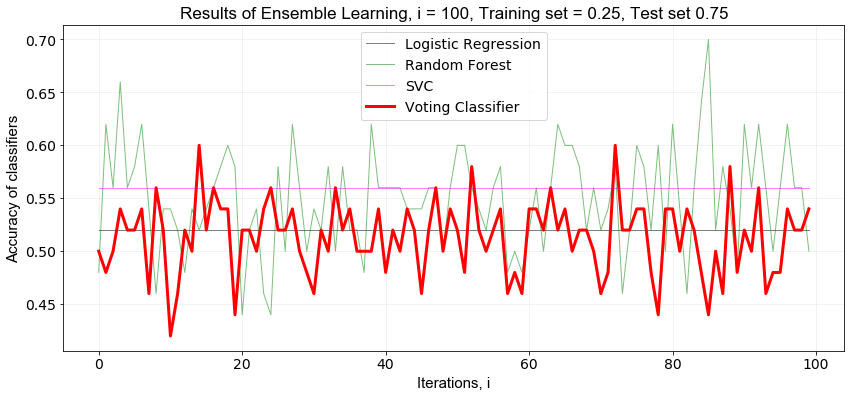

In [20]:
# Plot Results
from pylab import rcParams
rcParams['figure.figsize'] = 14, 6

_ = plt.plot(results_df.index, results_df['LogisticRegression'],
             label = 'Logistic Regression', color = 'black',
             linewidth = 1,
             alpha = 0.5)

_ = plt.plot(results_df.index, results_df['RandomForestClassifier'],
             label = 'Random Forest', color = 'green',
             linewidth = 1,
             alpha = 0.5)

_ = plt.plot(results_df.index, results_df['SVC'],
             label = 'SVC', color = 'magenta',
             linewidth = 1,
             alpha = 0.5)

_ = plt.plot(results_df.index, results_df['VotingClassifier'],
             label = 'Voting Classifier', color = 'red',
             linewidth = 3)

_ = plt.grid(which = 'major', alpha = 0.2)

_ = plt.title('Results of Ensemble Learning, i = 100, Training set = {}, Test set {}'.format(1 - set_size,
                                                                                             set_size),
              family = 'Arial',
              fontsize = 17)
_ = plt.xlabel('Iterations, i', family = 'Arial', fontsize = 15)
_ = plt.ylabel('Accuracy of classifiers', family = 'Arial', fontsize = 15)

_ = plt.xticks(fontsize = 14)
_ = plt.yticks(fontsize = 14)

_ = plt.legend(loc = 'best', markerscale = 2, fontsize = 14)

_ = plt.show()

<h2>Conclusions</h2>
<ul>>> Dummy variable scaling do not impact final results significanly.</ul>
<ul>>> Ensemble Learning Classifier can not win again other classifier with poor dataset</ul>
<ul>>> Feature Engineering must be apply before building ML model for better results.</ul>

<i>Prepared by Vytautas Bielinskas, 2018</i>